<a href="https://colab.research.google.com/github/Odai1725873/MV-Project/blob/main/Train_Data_and_Validate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-78-g90f2351 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
!unzip -q ../train_data.zip -d ../

In [ ]:
!unzip -q ../testing.zip -d ../

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights runs/train/exp4/weights/last.pt --img 640 --conf 0.25 --source ../testingvideo.mp4

# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['runs/train/exp4/weights/last.pt'], source=../testingvideo.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1410) /content/testingvideo.mp4: 352x640 1 Area not covered, 11.8ms
video 1/1 (2/1410) /content/testingvideo.mp4: 352x640 1 Area not covered, 8.6ms
video 1/1 (3/1410) /content/testingvideo.mp4: 352x640 1 Area not covered, 8.6ms
video 1/1 (4/1410) /content/testingvideo.mp4: 352x640 1 Area not covered, 11.3ms
video 1/1 (5/1410) /cont

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-1-gb32f67f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 1977.30it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:12<00:00,  2.17it/s]
                   all       5000      36335       0.67      0.521      0.566      0.371
Speed: 0.1ms pre-process, 2.9ms inference, 2.0ms NMS per image at shape (32, 

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-78-g90f2351 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

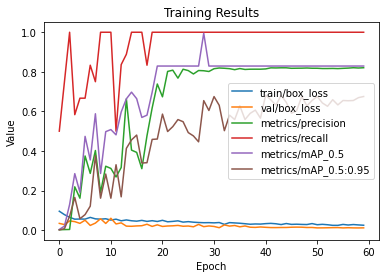

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('/content/yolov5/runs/train/exp/results.csv')

# Plot the train/box_loss, val/box_loss, metrics/precision, metrics/recall, metrics/mAP_0.5, metrics/mAP_0.5:0.95
plt.plot(df['               epoch'], df['      train/box_loss'], label='train/box_loss')
plt.plot(df['               epoch'], df['        val/box_loss'], label='val/box_loss')
plt.plot(df['               epoch'], df['   metrics/precision'], label='metrics/precision')
plt.plot(df['               epoch'], df['      metrics/recall'], label='metrics/recall')
plt.plot(df['               epoch'], df['     metrics/mAP_0.5'], label='metrics/mAP_0.5')
plt.plot(df['               epoch'], df['metrics/mAP_0.5:0.95'], label='metrics/mAP_0.5:0.95')

# Add legend and labels
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Results')

# Show the plot
plt.show()

In [ ]:
import cv2
import torch

# Load the model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Add the missing definitions for inputs and labels
inputs = ... # Add code here to initialize inputs with data
labels = ... # Add code here to initialize labels with data
inputs, labels = inputs.to(device), labels.to(device)

checkpoint = torch.load(r"best_.pt", map_location=torch.device('cpu'))
model = checkpoint['model']
model.eval()

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Pre-process the frame
    frame = frame.transpose((2, 0, 1)) # Transpose the input so that it is in the format (C, H, W)
    frame = torch.FloatTensor(frame).to(torch.device('cpu')) # Convert the input to a Tensor
    frame = frame.unsqueeze(0) # Adds a batch dimension to the input

    # Run the model on the frame
    with torch.no_grad():
        output = model(frame)

    # Post-process the output
    # TODO: Add code here to post-process the output

    # Display the result
    frame = frame.squeeze().transpose((1, 2, 0)) # Transpose the output back to its original format (H, W, C)
    frame = frame.numpy().astype('uint8') # Convert the Tensor back to a numpy array
    cv2.imshow("Webcam", frame)
    if cv2.waitKey(1) == 27:
        break

# Release the webcam
cap.release()
cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join
import serial
import time
import pyttsx3
q=1
x=0
c=0
m=0
d=0
while q<=2:
    data_path = 'C:/Users/user/Desktop/python/image/'
    onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path,f))]
    Training_data, Lebels = [],[]
    for i , files in enumerate(onlyfiles):
        image_path = data_path + onlyfiles[i]
        images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        Training_data.append(np.asarray(images, dtype = np.uint8)) 
        Lebels.append(i)

    Lebels = np.asarray(Lebels, dtype = np.int32)
    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(np.asarray(Training_data),np.asarray(Lebels))
    print("training complete")
    q+=1
face_classifier = cv2.CascadeClassifier('C:/Users/user/AppData/Local/Programs/Python/Python38\Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')


def speak(audio):
    engine.say(audio)
    engine.runAndWait()
engine = pyttsx3.init('sapi5')
voices=engine.getProperty('voices')
engine.setProperty("voice",voices[0].id)
engine.setProperty("rate",140)
engine.setProperty("volume",1000)


def face_detector(img, size= 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    if faces is():
        return img,[]
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    
    return img,roi

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()

    image, face = face_detector(frame)

    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        result= model.predict(face)
        if result[1]<500:

            confidence = int((1-(result[1])/300)*100)
            display_string = str(confidence)
            cv2.putText(image, display_string,(100,120),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,255,0))

        if confidence>=83:
            cv2.putText(image,"unlocked",(250,450),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,255,255))
            cv2.imshow('face',image)
            x+=1
        else:
            cv2.putText(image,"locked",(250,450),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,255,255))
            cv2.imshow('face',image)
            c+=1
    except:
        cv2.putText(image,"Face not found",(250,450),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,255,255))
        cv2.imshow('face',image)
        d+=1
        pass
    
    if cv2.waitKey(1)==13 or x==10 or c==30 or d==20:
        break
cap.release()
cv2.destroyAllWindows()
if x>=5:
    m=1
    ard = serial.Serial('com5' ,9600)
    time.sleep(2)
    var = 'a'
    c=var.encode()
    speak("Face recognition complete..it is matching with database...welcome..sir..Door is openning for 5 seconds")
    ard.write(c)
    time.sleep(4)
elif c==30:
    speak("face is not matching..please try again")
elif d==20:
    speak("face is not found please try again ")
if m==1:  
    speak("door is closing")

In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
